In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp,log
from sklearn.utils import shuffle

In [2]:
data_table = pd.read_csv('data_classification.csv')
bias_col = [1 for i in range(len(data_table))]
data_table.insert(loc=0,column='col0',value=bias_col)

In [3]:
data_table.head(10)

,col0,col1,col2,result
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
5,1,45.083277,56.316372,0
6,1,61.106665,96.511426,1
7,1,75.024746,46.554014,1
8,1,76.098787,87.420570,1
9,1,84.432820,43.533393,1


In [4]:
def sigmoid(z):   
    return 1/(1 + np.exp(-z))

In [5]:
def predict(row,coef):
    
    ypred = 0
    
    for i in range(len(row) - 1):
        
        ypred += coef[i] * row[i]
        
    return sigmoid(ypred)
    

In [6]:
def binary_cross_entropy(ypreds,ys):
    
    res = 0.0
    
    for ypred,y in zip(ypreds,ys):
        
        res += y*np.log(ypred) + (1 - y)*np.log(1 - ypred)

    res /= len(ypreds)
    
    res = -res
    
    return res
        

In [7]:
data_table.values

array([[ 1.        , 34.62365962, 78.02469282,  0.        ],
       [ 1.        , 30.28671077, 43.89499752,  0.        ],
       [ 1.        , 35.84740877, 72.90219803,  0.        ],
       [ 1.        , 60.18259939, 86.3085521 ,  1.        ],
       [ 1.        , 79.03273605, 75.34437644,  1.        ],
       [ 1.        , 45.08327748, 56.31637178,  0.        ],
       [ 1.        , 61.10666454, 96.51142588,  1.        ],
       [ 1.        , 75.02474557, 46.55401354,  1.        ],
       [ 1.        , 76.0987867 , 87.42056972,  1.        ],
       [ 1.        , 84.43281996, 43.53339331,  1.        ],
       [ 1.        , 95.86155507, 38.22527806,  0.        ],
       [ 1.        , 75.01365839, 30.60326323,  0.        ],
       [ 1.        , 82.30705337, 76.4819633 ,  1.        ],
       [ 1.        , 69.36458876, 97.71869196,  1.        ],
       [ 1.        , 39.53833914, 76.03681085,  0.        ],
       [ 1.        , 53.97105215, 89.20735014,  1.        ],
       [ 1.        , 69.

In [8]:
def sgd(train,lr,epochs):
    coef = [0.0 for i in range(len(train[0]) - 1)]
    
    loss_history = []
    
    for epoch in range(epochs):
                
        shuffle(train)
        
        for row in train:
            
            ypred = predict(row,coef)
            
            error = row[-1] - ypred
            
            #coef[0] = coef[0] + lr * error
            
            for i in range(len(row) - 1):
                
                coef[i] = coef[i] + lr * error * row[i]
                
            
        ys = []
        ypreds = []
        
        ys  = [row[-1] for row in train]
        ypreds = [predict(row,coef) for row in train]
        
        loss_history.append(binary_cross_entropy(ypreds,ys))    
                
    
    plt.plot(range(epochs),loss_history)
    
    return coef
            

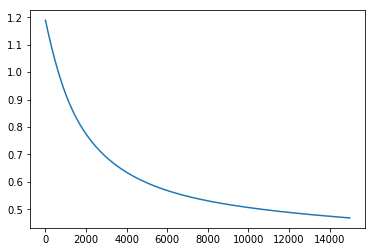

In [19]:
coef = sgd(data_table.values,0.0005,15000)

In [10]:
len(coef)

3